In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
df = pd.read_csv("interviewer_ratingSheet1.csv", index_col = "sr no.")
df

,interviewer,studentid,rating
sr no.,,,
1,10,1,4
2,10,2,4
3,10,3,4
4,10,4,5
5,10,5,3
6,20,1,4
7,20,2,3
8,20,3,3
9,20,4,3


To find the average rating of each student

In [24]:
rank_df=df[['studentid','rating']].groupby('studentid').mean()
print(rank_df)

           rating
studentid        
1            4.50
2            3.50
3            3.75
4            4.50
5            3.75
6            3.25
7            4.00
8            3.75
9            4.50
10           3.25


In [42]:
df1 = pd.read_csv("student.xlsx - Sheet1.csv",index_col='stuid')
df2 = pd.read_csv("student2.xlsx - Sheet1.csv",index_col='stuid',names=['stuid', 'name', 'marks'])
print(df1)
print(df2)

          name  marks
stuid                
1        Rajan     98
2       Revati     97
3       mugdha     57
4        Gauri     68
5      manjiri     70
          name  marks
stuid                
6      Atharva     98
7         Arti     97
8      Prakash     57
9       sanjay     68
10      pramod     35


In [44]:
# Merge 2 dataframes
df3=pd.concat([df1,df2])
df3.index.names = ['studentid']
df3

,name,marks
studentid,,
1,Rajan,98
2,Revati,97
3,mugdha,57
4,Gauri,68
5,manjiri,70
6,Atharva,98
7,Arti,97
8,Prakash,57
9,sanjay,68


In [46]:
# Merge 2 dataframes
rank_df=df[['studentid','rating']].groupby('studentid').mean()
df5=pd.concat([df3,rank_df],axis=1)
df5

,name,marks,rating
studentid,,,
1,Rajan,98,4.50
2,Revati,97,3.50
3,mugdha,57,3.75
4,Gauri,68,4.50
5,manjiri,70,3.75
6,Atharva,98,3.25
7,Arti,97,4.00
8,Prakash,57,3.75
9,sanjay,68,4.50


In [63]:
#Technology Column:
def myconvert(rating,marks):
    if rating>4 and marks>80 :
        return 'Python Project'
    elif rating>3 and marks>90:
        return 'Java Project'
    elif rating>4:
        return 'Python Training'
    else:
        return 'Java Training'
df5['technology'] = df5.apply(lambda row: myconvert(row['rating'], row['marks']), axis=1)    
df5

,name,marks,rating,technology,location
studentid,,,,,
1,Rajan,98,4.50,Python Project,Pune
2,Revati,97,3.50,Java Project,Pune
3,mugdha,57,3.75,Java Training,Mumbai
4,Gauri,68,4.50,Python Training,Mumbai
5,manjiri,70,3.75,Java Training,Delhi
6,Atharva,98,3.25,Java Project,Pune
7,Arti,97,4.00,Java Project,Pune
8,Prakash,57,3.75,Java Training,Mumbai
9,sanjay,68,4.50,Python Training,Mumbai


In [61]:
#Location Column:
def myconvert(marks):
    if marks>80 :
        return 'Pune'
    elif 70<=marks<=80:
        return 'Delhi'
    else:
        return 'Mumbai'
df5['location'] = df5['marks'].apply(myconvert)    
df5

,name,marks,rating,technology,location
studentid,,,,,
1,Rajan,98,4.50,Python Project,Pune
2,Revati,97,3.50,Java Project,Pune
3,mugdha,57,3.75,Java Training,Mumbai
4,Gauri,68,4.50,Python Training,Mumbai
5,manjiri,70,3.75,Java Training,Delhi
6,Atharva,98,3.25,Java Project,Pune
7,Arti,97,4.00,Java Project,Pune
8,Prakash,57,3.75,Java Training,Mumbai
9,sanjay,68,4.50,Python Training,Mumbai


<Axes: xlabel='location', ylabel='count'>

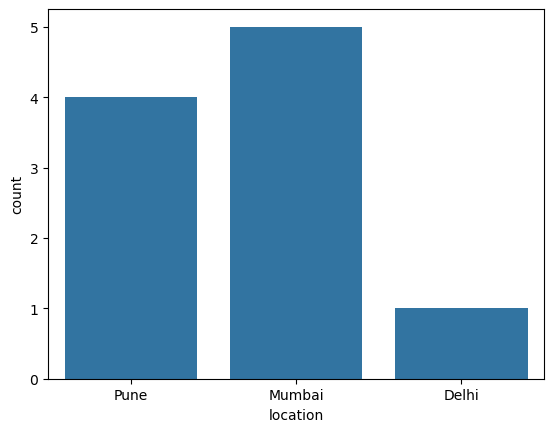

In [64]:
sns.countplot(x="location",data=df5)